In [7]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: [Errno 17] File exists: 'cats_vs_dogs_small/train/cat'

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [10]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics=["accuracy"])

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180, 180), batch_size=32)

validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=32)

test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape: ", data_batch.shape)
    print("labels batch size: ", labels_batch.shape)
    break

data batch shape:  (32, 180, 180, 3)
labels batch size:  (32,)


2023-04-06 09:45:26.646141: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="convert_from_scratch.keras",
                                    save_best_only=True,
                                    monitor="val_loss")
]
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 9s 100ms/step - loss: 0.7577 - accuracy: 0.5120 - val_loss: 0.6871 - val_accuracy: 0.5110
Epoch 2/30
63/63 [==============================] - 6s 93ms/step - loss: 0.7065 - accuracy: 0.5530 - val_loss: 0.6773 - val_accuracy: 0.5180
Epoch 3/30
63/63 [==============================] - 6s 93ms/step - loss: 0.6841 - accuracy: 0.5885 - val_loss: 0.6629 - val_accuracy: 0.5360
Epoch 4/30
63/63 [==============================] - 6s 92ms/step - loss: 0.6568 - accuracy: 0.6050 - val_loss: 0.7043 - val_accuracy: 0.5320
Epoch 5/30
63/63 [==============================] - 6s 92ms/step - loss: 0.6603 - accuracy: 0.6480 - val_loss: 0.7928 - val_accuracy: 0.6200
Epoch 6/30
63/63 [==============================] - 6s 93ms/step - loss: 0.5739 - accuracy: 0.7155 - val_loss: 0.5896 - val_accuracy: 0.6950
Epoch 7/30
63/63 [==============================] - 6s 92ms/step - loss: 0.5215 - accuracy: 0.7455 - val_loss: 0.6131 - val_accuracy: 0.6500
Epoch 8/30
6

In [18]:
history.history

{'loss': [0.7577250003814697,
  0.7064583897590637,
  0.6840916275978088,
  0.6568056344985962,
  0.6603094339370728,
  0.5738978385925293,
  0.5214934945106506,
  0.49019700288772583,
  0.44541096687316895,
  0.37073710560798645,
  0.32243838906288147,
  0.2664639353752136,
  0.2094826102256775,
  0.165804922580719,
  0.12863510847091675,
  0.12120664864778519,
  0.09671508520841599,
  0.06577005237340927,
  0.06355227530002594,
  0.06700869649648666,
  0.06542903929948807,
  0.031822316348552704,
  0.0778840035200119,
  0.047431644052267075,
  0.06691703200340271,
  0.04587480425834656,
  0.07569675147533417,
  0.04586406424641609,
  0.05206119641661644,
  0.03437211737036705],
 'accuracy': [0.5120000243186951,
  0.5529999732971191,
  0.5885000228881836,
  0.6050000190734863,
  0.6480000019073486,
  0.715499997138977,
  0.7455000281333923,
  0.7634999752044678,
  0.800000011920929,
  0.840499997138977,
  0.8565000295639038,
  0.8855000138282776,
  0.9139999747276306,
  0.9375,
  0.95

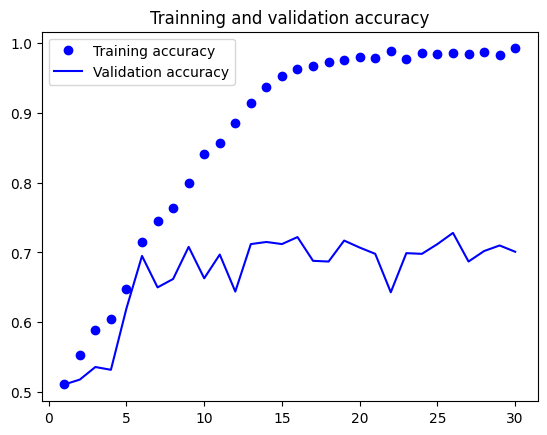

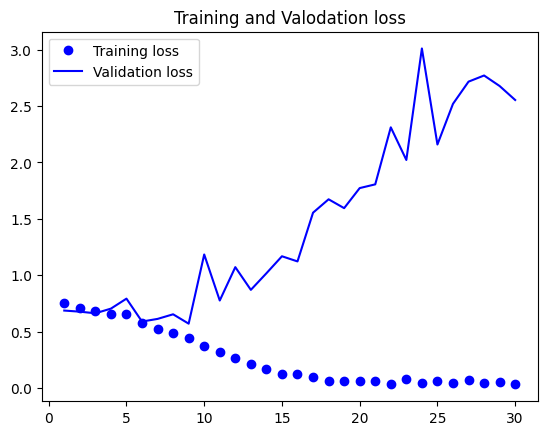

In [19]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Trainning and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Valodation loss")
plt.legend()
plt.show()

In [20]:
test_model = keras.models.load_model("convert_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 30ms/step - loss: 0.5741 - accuracy: 0.7045
Test accuracy: 0.705


In [21]:
# data extension
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

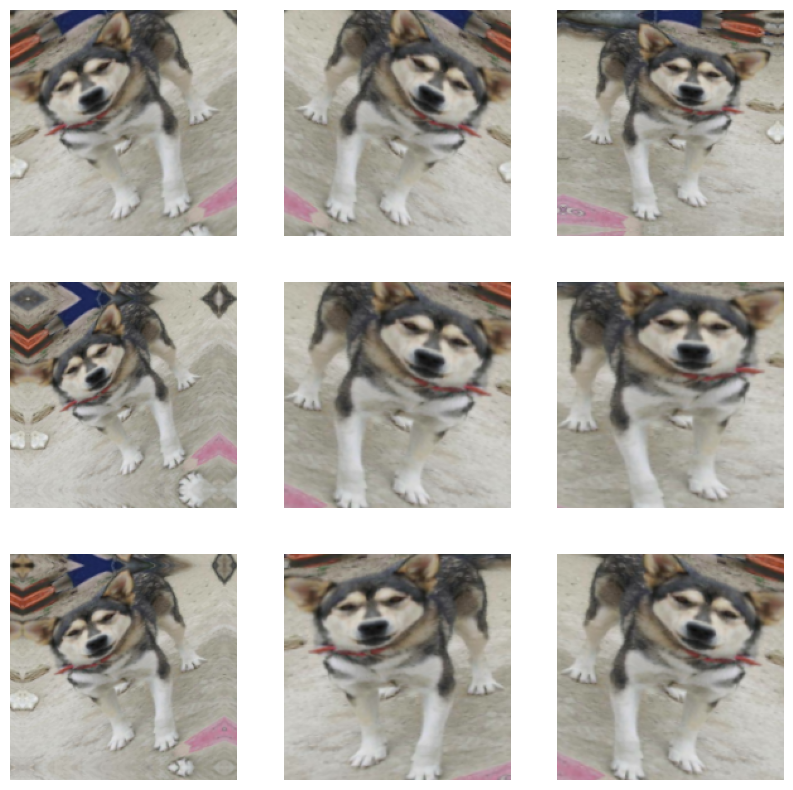

In [22]:
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augumented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augumented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)